In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv("airway_scaledcounts.csv")
df_meta = pd.read_csv("airway_metadata.csv")

In [61]:
df = df.set_index("ensgene").T.reset_index()

In [62]:
data = pd.concat([df_meta, df], axis = 1)

In [113]:
clean_data = pd.DataFrame()
for c in data.columns:
    if data[c].dtype == object:
        clean_data[c] = data[c]
    if data[c].dtype == float and np.sum(data[c]) > 10:
        clean_data[c] = data[c]

In [119]:
clean_data

,id,dex,celltype,geo_id,index,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000971,...,ENSG00000283070,ENSG00000283085,ENSG00000283086,ENSG00000283087,ENSG00000283088,ENSG00000283091,ENSG00000283094,ENSG00000283100,ENSG00000283101,ENSG00000283104
0,SRR1039508,control,N61311,GSM1275862,SRR1039508,723.0,467.0,347.0,96.0,3413.0,...,4.0,1260.0,4.0,190.0,1.0,51.0,2187.0,647.0,3.0,71.0
1,SRR1039509,treated,N61311,GSM1275863,SRR1039509,486.0,523.0,258.0,81.0,3916.0,...,0.0,774.0,5.0,182.0,13.0,42.0,1536.0,570.0,3.0,70.0
2,SRR1039512,control,N052611,GSM1275866,SRR1039512,904.0,616.0,364.0,73.0,6000.0,...,7.0,1034.0,10.0,332.0,72.0,79.0,2491.0,645.0,9.0,116.0
3,SRR1039513,treated,N052611,GSM1275867,SRR1039513,445.0,371.0,237.0,66.0,4308.0,...,6.0,437.0,1.0,187.0,13.0,34.0,1253.0,369.0,10.0,45.0
4,SRR1039516,control,N080611,GSM1275870,SRR1039516,1170.0,582.0,318.0,118.0,6424.0,...,5.0,1057.0,6.0,332.0,47.0,87.0,2316.0,688.0,4.0,95.0
5,SRR1039517,treated,N080611,GSM1275871,SRR1039517,1097.0,781.0,447.0,94.0,10723.0,...,5.0,1129.0,10.0,390.0,62.0,96.0,2026.0,670.0,13.0,83.0
6,SRR1039520,control,N061011,GSM1275874,SRR1039520,806.0,417.0,330.0,102.0,5039.0,...,1.0,1009.0,3.0,156.0,36.0,55.0,2000.0,550.0,7.0,84.0
7,SRR1039521,treated,N061011,GSM1275875,SRR1039521,604.0,509.0,324.0,74.0,7803.0,...,3.0,722.0,2.0,239.0,33.0,51.0,1529.0,572.0,7.0,79.0


In [121]:
pca = PCA(n_components=2)

In [124]:
clean_data_numeric = list(clean_data.columns[clean_data.dtypes ==  "float"])

In [126]:
pca.fit(clean_data[clean_data_numeric])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [149]:
data_pca = pca.transform(clean_data[clean_data_numeric])

In [151]:
data_pca = pd.concat([df_meta,pd.DataFrame(data_pca, columns = ["pca_1","pca_2"])],axis = 1, )

In [152]:
data_pca

,id,dex,celltype,geo_id,pca_1,pca_2
0,SRR1039508,control,N61311,GSM1275862,-123946.970519,167060.714108
1,SRR1039509,treated,N61311,GSM1275863,-234479.248036,-9961.274495
2,SRR1039512,control,N052611,GSM1275866,222198.305914,51290.650562
3,SRR1039513,treated,N052611,GSM1275867,-259110.419475,-145412.994316
4,SRR1039516,control,N080611,GSM1275870,174242.011941,234978.153619
5,SRR1039517,treated,N080611,GSM1275871,372632.158110,-207292.079183
6,SRR1039520,control,N061011,GSM1275874,-80841.216944,80079.097886
7,SRR1039521,treated,N061011,GSM1275875,-70694.620990,-170742.268181


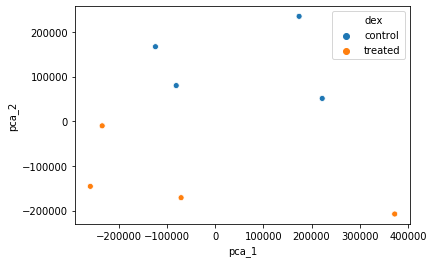

In [157]:
sns.scatterplot(data_pca["pca_1"], data_pca["pca_2"], hue=data_pca.dex)